# Predict NEW York City House Prices

# Description

- This Data Set consists of 22 columns of Data.

- Properties sold in New York City over a 12-month period from September 2016 to September 2017.

- Each Borough is associated with a code Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

- Class 2 properties consisered as income producing properties



# Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
dataframe = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
dataframe.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Cleaning

- Deleting Unwanted Columns
- Getting rid of symbols (-)
- Checking and removing duplicate date
- Check For Missing values and filling them

In [4]:
#Delete Columns
del dataframe['EASE-MENT']
del dataframe['APARTMENT NUMBER']
del dataframe['Unnamed: 0']


In [5]:
#Dropping symbols

dataframe['SALE_PRICE'] = dataframe['SALE PRICE']
new_df = dataframe[~dataframe.SALE_PRICE.str.contains("-")]

new_df['LAND_SQUARE_FEET'] = new_df['LAND SQUARE FEET']
new_df = new_df[~new_df.LAND_SQUARE_FEET.str.contains("-")]

new_df['GROSS_SQUARE_FEET'] = new_df['GROSS SQUARE FEET']
new_df = new_df[~new_df.GROSS_SQUARE_FEET.str.contains("-")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
#Checking For Duplicates
sum(new_df.duplicated(new_df.columns))

348

In [7]:
#Delete the duplicates and check that it worked
new_df = new_df.drop_duplicates(new_df.columns, keep='last')
sum(new_df.duplicated(new_df.columns))

0

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47896 entries, 0 to 84547
Data columns (total 22 columns):
BOROUGH                           47896 non-null int64
NEIGHBORHOOD                      47896 non-null object
BUILDING CLASS CATEGORY           47896 non-null object
TAX CLASS AT PRESENT              47896 non-null object
BLOCK                             47896 non-null int64
LOT                               47896 non-null int64
BUILDING CLASS AT PRESENT         47896 non-null object
ADDRESS                           47896 non-null object
ZIP CODE                          47896 non-null int64
RESIDENTIAL UNITS                 47896 non-null int64
COMMERCIAL UNITS                  47896 non-null int64
TOTAL UNITS                       47896 non-null int64
LAND SQUARE FEET                  47896 non-null object
GROSS SQUARE FEET                 47896 non-null object
YEAR BUILT                        47896 non-null int64
TAX CLASS AT TIME OF SALE         47896 non-null int64
BUIL

In [9]:
#checking missing values

new_df.columns[new_df.isnull().any()]

Index([], dtype='object')

# Detection
- Turn values numeric
- Check the Dependent

In [10]:
#Turning Sale_price Numeric
new_df['SALE_PRICE'] = pd.to_numeric(new_df['SALE_PRICE'], errors='coerce')

#Turning LAND_SQUARE_FEET Numeric
new_df['LAND_SQUARE_FEET'] = pd.to_numeric(new_df['LAND_SQUARE_FEET'], errors='coerce')

#Turning GROSS_SQUARE_FEET Numeric
new_df['GROSS_SQUARE_FEET'] = pd.to_numeric(new_df['GROSS_SQUARE_FEET'], errors='coerce')

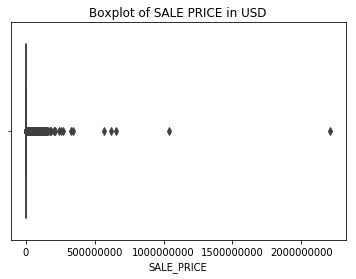

In [11]:
# Plot the data and configure the settings
sns.boxplot(x='SALE_PRICE', data=new_df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

 # Dependent
 
The dependent value needs to be improved.

- We see that the most of the prices are between 0 to 5 million
- There are outliers, getting rid of them will make more sense
- From this observation we can set a standered sale price between 1 millon to 5 Million

In [12]:
# #Removing Outliers and Data Below 100,000 and above  caps 
new_df = new_df[(new_df['SALE_PRICE'] > 100000) & (new_df['SALE_PRICE'] < 5000000)]

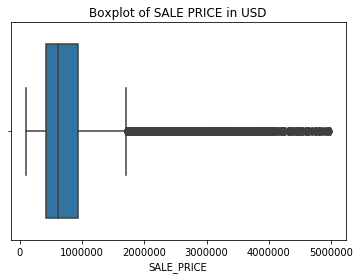

In [13]:
sns.boxplot(x='SALE_PRICE', data=new_df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
len(new_df)
plt.show()

In [14]:
len(new_df)

34702

- This looks better sale prices are ranging from 1 million to 5 million.
- We did lose  data counting to 34702

# Locations
- Location Location Location!
- One of the most important factors in real estate is location.
- Lets take a look at the sale prices of each borough.
- Looks like Manhatten has most of the sales here with a mean approximatly between 3.5 million to 1.5 million.
- The bulk data from other boroughs are smaller ranging with a mean below the 2 million mark.

In [15]:
new_df['BOROUGH_CODE']=new_df['BOROUGH']

In [16]:
import warnings
warnings.filterwarnings('ignore')

new_df['BOROUGH'][new_df['BOROUGH'] == 1] = 'Manhattan'
new_df['BOROUGH'][new_df['BOROUGH'] == 2] = 'Bronx'
new_df['BOROUGH'][new_df['BOROUGH'] == 3] = 'Brooklyn'
new_df['BOROUGH'][new_df['BOROUGH'] == 4] = 'Queens'
new_df['BOROUGH'][new_df['BOROUGH'] == 5] = 'Staten Island'

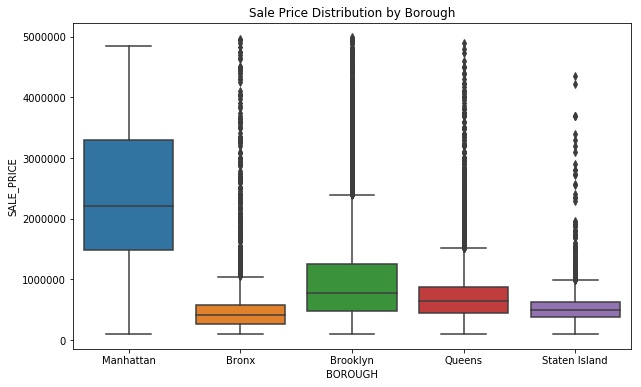

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE_PRICE', data=new_df)
plt.title('Sale Price Distribution by Borough')
plt.show()

Looks like Manhatten has most of the sales here with a mean 
anywhere between 3.5 million to 1.5 million.
The bulk data from other boroughs are smaller ranging with a mean below the 2 million mark. 



In [62]:
#Building Age should be greater than 0 and less than 250 years
new_df = new_df[(new_df['ZIP CODE'] > 10000) & (new_df['ZIP CODE'] < 12000)]

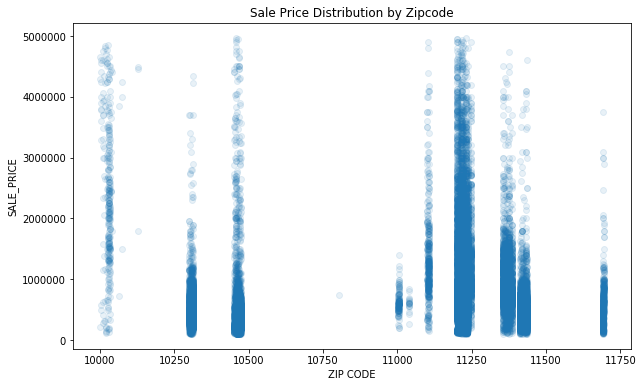

In [63]:
plt.figure(figsize=(10,6))
sns.regplot(x='ZIP CODE', y='SALE_PRICE', data=new_df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Zipcode')
plt.show()

# Building Age

- Building Age can have a impact on the price of a property. 
- This dataset provides us the selling date and built date. 
- We will subtract them to find the exact age of the property during the sale.
- Also we will remove outliers and Null data that is over 250 years and less than 1 year.

In [64]:
new_df['SALE_DATE']= new_df['SALE DATE'].str.rstrip('00:00:00')
new_df['SALE_DATE']=pd.DatetimeIndex(new_df['SALE_DATE']).year
new_df['Building_Age']=new_df['SALE_DATE']-new_df['YEAR BUILT']

In [65]:
#Building Age should be greater than 0 and less than 250 years
new_df = new_df[(new_df['Building_Age'] > 0) & (new_df['Building_Age'] < 250)]

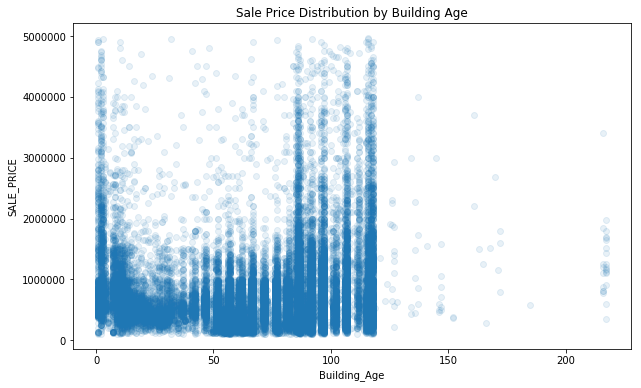

In [66]:
plt.figure(figsize=(10,6))
sns.regplot(x='Building_Age', y='SALE_PRICE', data=new_df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

# Metrics

Following Metrics will be important as we look to explore more factors that effect property sale prices.
- Gross Square Feet - This equals to the building square feet and the land square feet
- Land Square Feet - Is the outside land excluding  the buidling (back yard,front yard, front court, playgrounds etc)
- Commercial units - Commerical typically is occupied by business such as stores,shops and places of transactions
- Residential - Residential units are occupied by people who live single home,multifamily,aprtments and condos are in this category. 
- Total units - This is the combination of residential and commerical units in a single property.
- Lot/Block - Lot and block format of survey system for land description. A unique combination number of lot-and-block is assigned to a land.


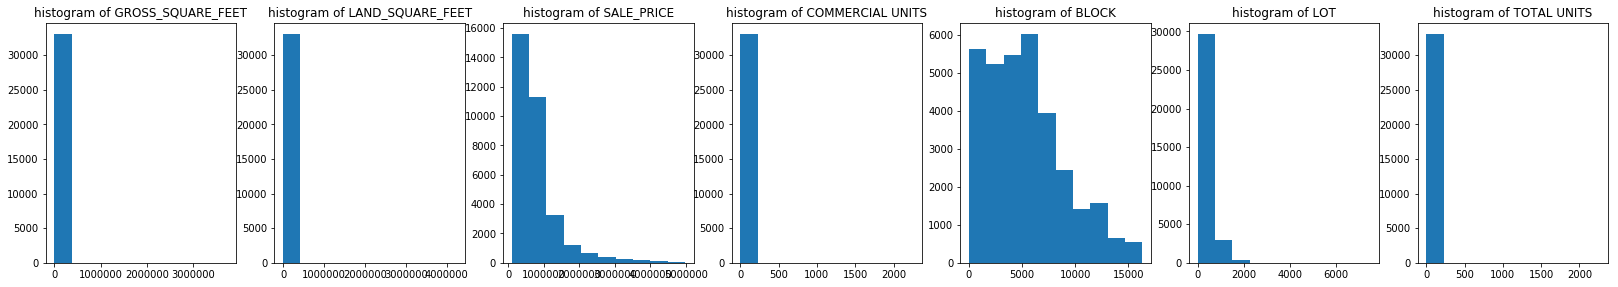

In [67]:
plt.figure(figsize=(28,15))



# histograms of the original data
plt.subplot(3, 7, 1)
plt.hist(new_df["GROSS_SQUARE_FEET"])
plt.title("histogram of GROSS_SQUARE_FEET")


plt.subplot(3, 7, 2)
plt.hist(new_df["LAND_SQUARE_FEET"])
plt.title("histogram of LAND_SQUARE_FEET")

plt.subplot(3, 7, 3)
plt.hist(new_df["SALE_PRICE"])
plt.title("histogram of SALE_PRICE")


plt.subplot(3, 7, 4)
plt.hist(new_df["COMMERCIAL UNITS"])
plt.title("histogram of COMMERCIAL UNITS")


plt.subplot(3, 7, 5)
plt.hist(new_df["BLOCK"])
plt.title("histogram of BLOCK")


plt.subplot(3, 7, 6)
plt.hist(new_df["LOT"])
plt.title("histogram of LOT")


plt.subplot(3, 7, 7)
plt.hist(new_df["TOTAL UNITS"])
plt.title("histogram of TOTAL UNITS")


plt.show()

In [68]:
#Removing 0 from  Gross Square Feet
new_df = new_df[(new_df['GROSS_SQUARE_FEET'] > 0) & (new_df['GROSS_SQUARE_FEET'] < 20000)]

In [69]:
# Making sure that residential and commericail units actually equal total units 
new_df = new_df[new_df['TOTAL UNITS'] == new_df['COMMERCIAL UNITS'] + new_df['RESIDENTIAL UNITS']]

# Units are ranging from 1 to 25
new_df = new_df[(new_df['TOTAL UNITS'] > 0) & (new_df['TOTAL UNITS'] < 25)]

In [75]:
model_df=new_df.drop(['BOROUGH','TAX CLASS AT PRESENT','ADDRESS','BUILDING CLASS AT PRESENT','LAND SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE',
             'GROSS SQUARE FEET','SALE PRICE','SALE DATE','SALE_DATE'],axis = 1)

# Metrics And Sale Price

We need to do more clening and future engineering before the modeling phase with these columns.

- The Gross Square Feet needs to be greater than zero. Removing some values that equals to zero will provide greater insight.
- Units are ranging from 1 to 25
- Since Lot is a combination of Residential and Commericial units, we need a function to add these two toghter to confirm the sum.



Text(0, 0.5, 'COMMERCIAL UNITS')

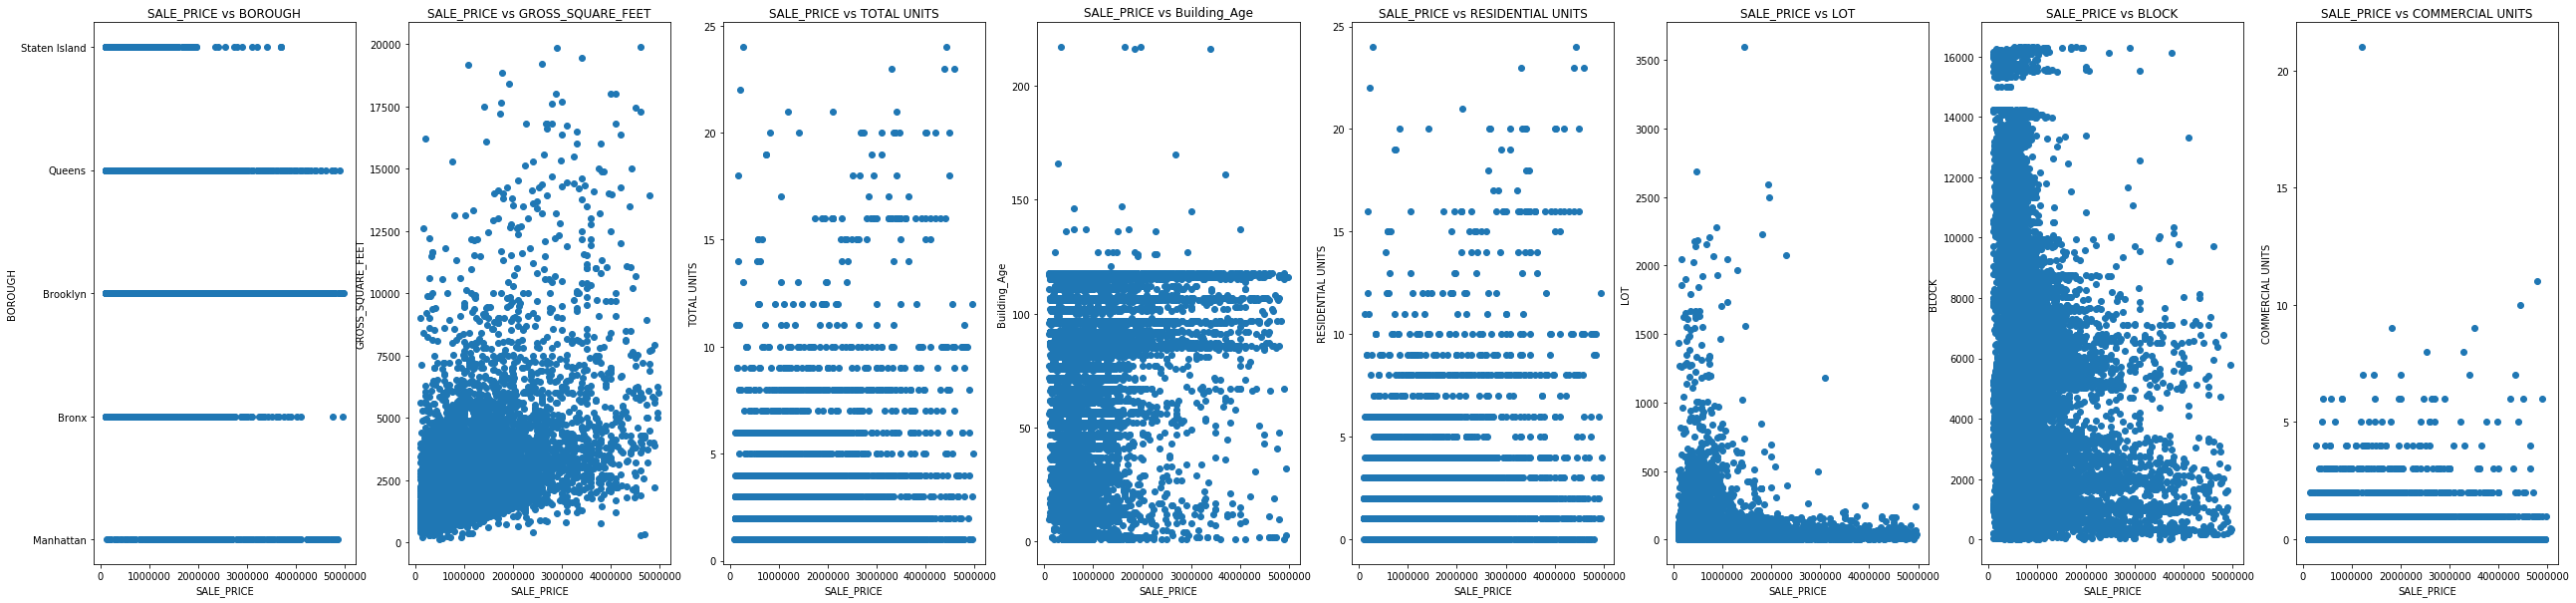

In [76]:
plt.figure(figsize=(50,10))

plt.subplot(1,9,1)
plt.scatter(new_df["SALE_PRICE"], new_df["BOROUGH"])
plt.title("SALE_PRICE vs BOROUGH")
plt.xlabel('SALE_PRICE')
plt.ylabel('BOROUGH')

plt.subplot(1,9,2)
plt.scatter(new_df["SALE_PRICE"], new_df["GROSS_SQUARE_FEET"])
plt.title("SALE_PRICE vs GROSS_SQUARE_FEET")
plt.xlabel('SALE_PRICE')
plt.ylabel('GROSS_SQUARE_FEET')

plt.subplot(1,9,3)
plt.scatter(new_df["SALE_PRICE"], new_df["TOTAL UNITS"])
plt.title("SALE_PRICE vs TOTAL UNITS")
plt.xlabel('SALE_PRICE')
plt.ylabel('TOTAL UNITS')

plt.subplot(1,9,4)
plt.scatter(new_df["SALE_PRICE"], new_df["Building_Age"])
plt.title("SALE_PRICE vs Building_Age")
plt.xlabel('SALE_PRICE')
plt.ylabel('Building_Age')

plt.subplot(1,9,5)
plt.scatter(new_df["SALE_PRICE"], new_df["RESIDENTIAL UNITS"])
plt.title("SALE_PRICE vs RESIDENTIAL UNITS")
plt.xlabel('SALE_PRICE')
plt.ylabel('RESIDENTIAL UNITS')


plt.subplot(1,9,6)
plt.scatter(new_df["SALE_PRICE"], new_df["LOT"])
plt.title("SALE_PRICE vs LOT")
plt.xlabel('SALE_PRICE')
plt.ylabel('LOT')



plt.subplot(1,9,7)
plt.scatter(new_df["SALE_PRICE"], new_df["BLOCK"])
plt.title("SALE_PRICE vs BLOCK")
plt.xlabel('SALE_PRICE')
plt.ylabel('BLOCK')



plt.subplot(1,9,8)
plt.scatter(new_df["SALE_PRICE"], new_df["COMMERCIAL UNITS"])
plt.title("SALE_PRICE vs COMMERCIAL UNITS")
plt.xlabel('SALE_PRICE')
plt.ylabel('COMMERCIAL UNITS')







# Finding Correlations

The Correlation matrix below shows positive and negative correlations to sale price.

Following are in order as the most correlated metrics to Sale Price. 
1. Total Units
2. Gross Square feet
3. Age
4. Lot
5. Residential Units
6. Block
7. Commerical Units

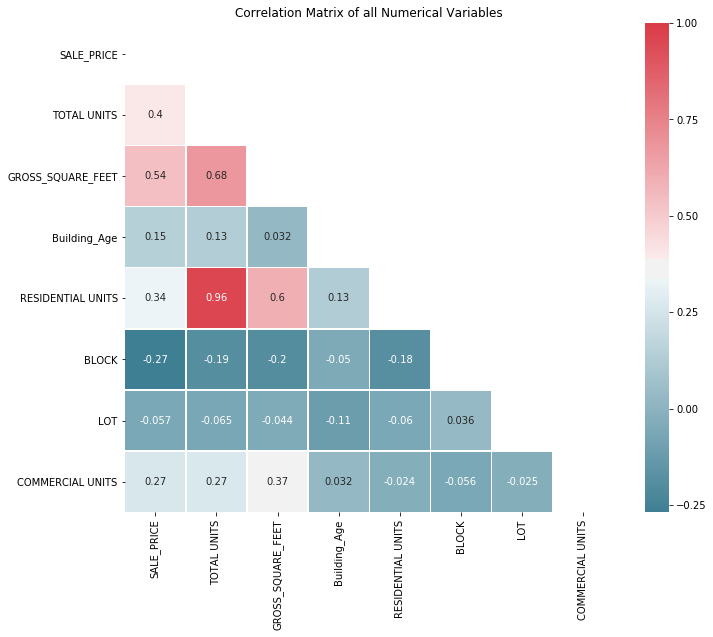

In [77]:
# Correlation Matrix

# Compute the correlation matrix
d= new_df[['SALE_PRICE','TOTAL UNITS','GROSS_SQUARE_FEET', 'Building_Age','RESIDENTIAL UNITS','BLOCK','LOT', 
         'COMMERCIAL UNITS','BOROUGH']]

corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

We can do further analysis to understand the metric correlations to sale price. 

This will be useful to the model preparation.

In [78]:
def data_function(data1,data2):

    new_df1 = pd.DataFrame()
    new_df1['SALE_PRICE'] = (new_df['SALE_PRICE'] - new_df['SALE_PRICE'].mean()) / new_df['SALE_PRICE'].std()
    new_df[data1] = (new_df[data1] - new_df[data1].mean()) / new_df[data1].std()

    t = sns.regplot(
    data1,
    'SALE_PRICE',
    new_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title(data2)

    sns.regplot(data1,'SALE_PRICE',
            new_df, 
            scatter=False, 
            color="red")

    plt.show()
    
    
    

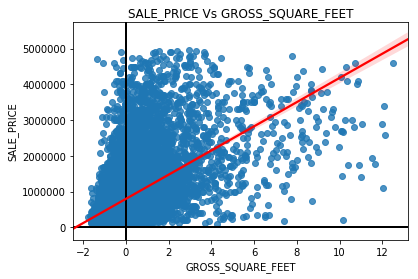

In [79]:
data_function('GROSS_SQUARE_FEET',"SALE_PRICE Vs GROSS_SQUARE_FEET")

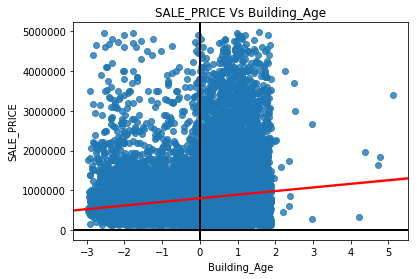

In [80]:
data_function('Building_Age',"SALE_PRICE Vs Building_Age")

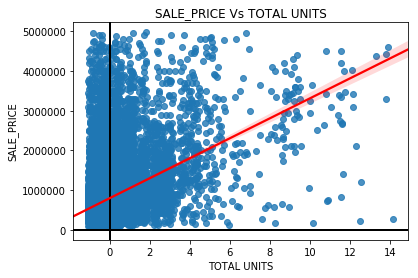

In [81]:
data_function('TOTAL UNITS',"SALE_PRICE Vs TOTAL UNITS")

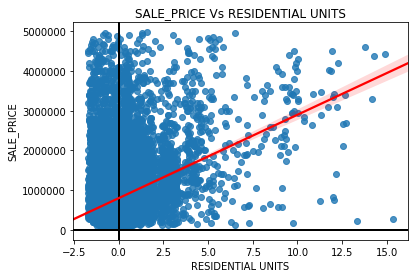

In [82]:
data_function('RESIDENTIAL UNITS',"SALE_PRICE Vs RESIDENTIAL UNITS")

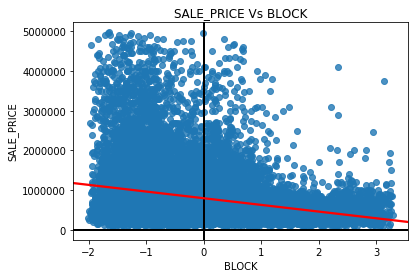

In [83]:
data_function('BLOCK',"SALE_PRICE Vs BLOCK")

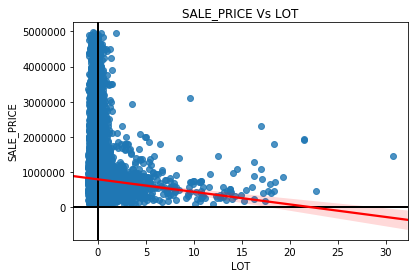

In [84]:
data_function('LOT',"SALE_PRICE Vs LOT")

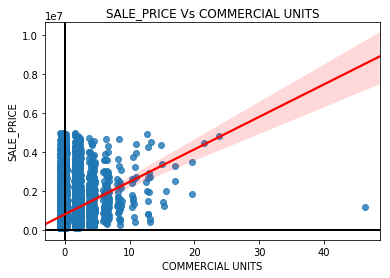

In [85]:
data_function('COMMERCIAL UNITS',"SALE_PRICE Vs COMMERCIAL UNITS")

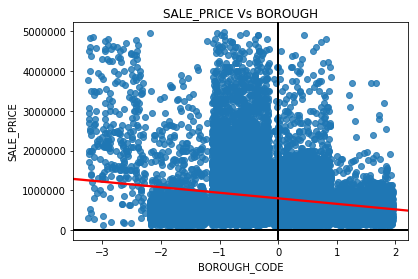

In [86]:
data_function('BOROUGH_CODE',"SALE_PRICE Vs BOROUGH")

# Model Preparation

From the analysis above we have an idea for the best canditates to our model.

- We will be one hot encodning unique values of some categories.

- Making sure our dependent is normalized.

- Dropping categories that will be not used in the model.

- combining values that are correlated to best fit the model.

In [96]:
model_df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE_PRICE,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,BOROUGH_CODE,Building_Age
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,10009,10,0,10,3936272,2272,6794,1,103
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,406,32,10009,8,0,8,3192840,1750,4226,1,96
172,ALPHABET CITY,14 RENTALS - 4-10 UNIT,391,19,10009,3,1,4,3300000,1520,3360,1,106
174,ALPHABET CITY,14 RENTALS - 4-10 UNIT,394,5,10009,5,1,6,4750000,1779,3713,1,107
195,ALPHABET CITY,22 STORE BUILDINGS,390,34,10009,0,1,1,3700000,1218,3586,1,117
222,CHELSEA,07 RENTALS - WALKUP APARTMENTS,765,25,10011,9,0,9,1583840,1566,6330,1,116
223,CHELSEA,07 RENTALS - WALKUP APARTMENTS,765,25,10011,9,0,9,416790,1566,6330,1,116
224,CHELSEA,07 RENTALS - WALKUP APARTMENTS,765,25,10011,9,0,9,630370,1566,6330,1,116
233,CHELSEA,07 RENTALS - WALKUP APARTMENTS,790,63,10011,8,0,8,3485000,2000,4100,1,106
234,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,695,6,10011,6,1,7,4600000,2469,19892,1,2


In [95]:
model_df.to_csv('model_df.csv')

We found that our dependent to not normalized in ournpast visualizations.

Log transformation is conducted to normalize the dependent.

# Dropping Values



In [1]:
new_df['SALE_PRICE'] = np.log(new_df['SALE_PRICE'])

plt.figure(figsize=(10,6))
sns.distplot(new_df['SALE_PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()

NameError: name 'np' is not defined

# Dropping Values

In [ ]:
# 

In [2]:
new_df['SALE_PRICE'] .describe()

NameError: name 'new_df' is not defined